In [1]:
import pandas as pd


In [5]:
data = pd.read_csv('EGFR_PubChem.csv')
data

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.131519
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.169440
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.298301
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.481351
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.598104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,9789,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.076382
9790,9790,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.035182
9791,9791,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.121621
9792,9792,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.070844


In [6]:
x = data.drop(['pIC50'], axis=1)
x

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,9789,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9790,9790,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9791,9791,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9792,9792,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = data.pIC50
y

0       8.131519
1       8.169440
2       8.298301
3       8.481351
4       8.598104
          ...   
9789    8.076382
9790    8.035182
9791    8.121621
9792    8.070844
9793    8.092819
Name: pIC50, Length: 9794, dtype: float64

In [12]:
x.to_csv('descriptor_list.csv', index = False)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(x, y)


RandomForestRegressor(n_estimators=500, random_state=42)

In [15]:
model_score = model.score(x, y)
model_score

0.9446985919206571

In [16]:
feature_importances = model.feature_importances_


In [17]:
import numpy as np
import matplotlib.pyplot as plt



In [18]:
sorted_indices = np.argsort(feature_importances)[::-1]


In [19]:
feature_names = [f'Feature {i+1}' for i in range(len(feature_importances))]


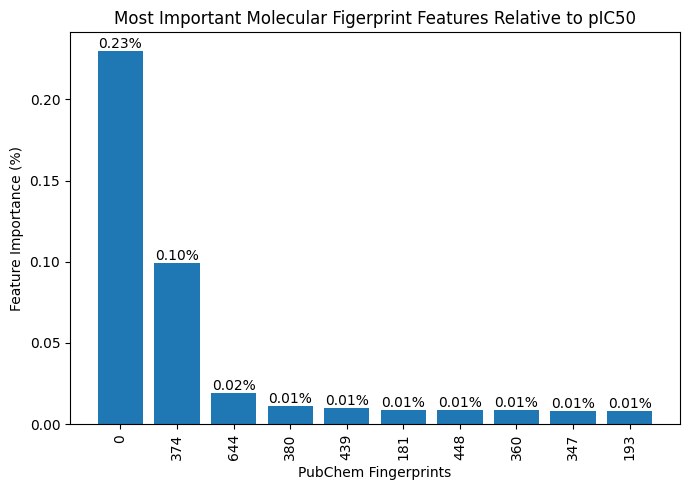

In [20]:
top_n = 10  # Number of top features to plot
top_indices = sorted_indices[:top_n]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(7, 5))
bars = plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_indices, rotation=90)
plt.xlabel('PubChem Fingerprints')
plt.ylabel('Feature Importance (%)')
plt.title('Most Important Molecular Figerprint Features Relative to pIC50')
plt.tight_layout()

# Add percentage labels on top of each bar
for bar, importance in zip(bars, top_importances):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{importance:.2f}%', ha='center', va='bottom')

plt.show()

In [22]:
data_1 = pd.read_csv('EGFR_inhibitors_analysis.csv')

In [23]:
prediction = model.predict(x)
prediction


array([8.18106702, 8.24410676, 8.27043932, ..., 8.11107131, 8.08398722,
       8.09685335])

In [24]:
pd.DataFrame(prediction).to_csv("predicted_pIC50.csv")
data_prediction = pd.read_csv("predicted_pIC50.csv")

In [25]:
data_2 = pd.concat([data_1,data_prediction], axis=1)

In [26]:
data_2

,Unnamed: 0,molecule_chembl_id,canonical_smiles,pIC50,Unnamed: 0,0
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,8.131519,0,8.181067
1,1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,8.169440,1,8.244107
2,2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,8.298301,2,8.270439
3,3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,8.481351,3,8.468474
4,4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,8.598104,4,8.500668
...,...,...,...,...,...,...
9789,9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,8.076382,9789,8.090225
9790,9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.035182,9790,8.072592
9791,9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.121621,9791,8.111071
9792,9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.070844,9792,8.083987


In [27]:
data_2.to_csv("EGFR_Final.csv")

In [28]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, prediction))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, prediction))

Mean squared error: 0.00
Coefficient of determination (R^2): 0.94


In [29]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Actual pIC50 Values')

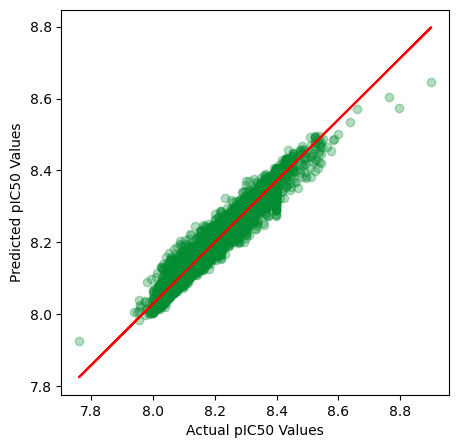

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y=prediction, c="#038c31", alpha=0.3)


z = np.polyfit(y, prediction, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#ff0000")
plt.ylabel('Predicted pIC50 Values')
plt.xlabel('Actual pIC50 Values')